In [13]:
import os
import sys

sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import cv2 

def read_mask(path):
    return cv2.imread(path, 0).squeeze() / 255

def read_image(path):
    return cv2.imread(path)[..., ::-1].copy()

In [15]:
def add_mask(image, mask, channel='r', intensity=100):

        r, g, b = image.transpose(2,0,1)
        mask = mask.squeeze() * intensity

        if channel == 'r':
            r = r.astype(np.uint16) + mask.astype(np.uint16)
            r = np.clip(r, 0, 255).astype(np.uint8)

        if channel == 'g':
            g = g.astype(np.uint16) + mask.astype(np.uint16)
            g = np.clip(g, 0, 255).astype(np.uint8)

        if channel == 'b':
            b = b.astype(np.uint16) + mask.astype(np.uint16)
            b = np.clip(b, 0, 255).astype(np.uint8)

        image = np.stack((r, g, b)).transpose(1,2,0)

        return image

In [30]:
image = read_image('../../data/dataset/train/images/AZ74029PBGFI0291.png')

mask = read_mask('../../data/predictions/test_1/images/exp-3/AZ74029PBGFI0291.png')
bord = read_mask('../../data/predictions/test_1/images/exp-5/AZ74029PBGFI0291.png')

In [31]:
res = (mask - bord).clip(0, 1).round()

# Visualize

In [36]:
vis_image = add_mask(image, mask, channel='r', intensity=120)
vis_image = add_mask(vis_image, bord, channel='b', intensity=250)

vis_result = add_mask(image, res, channel='r', intensity=120)

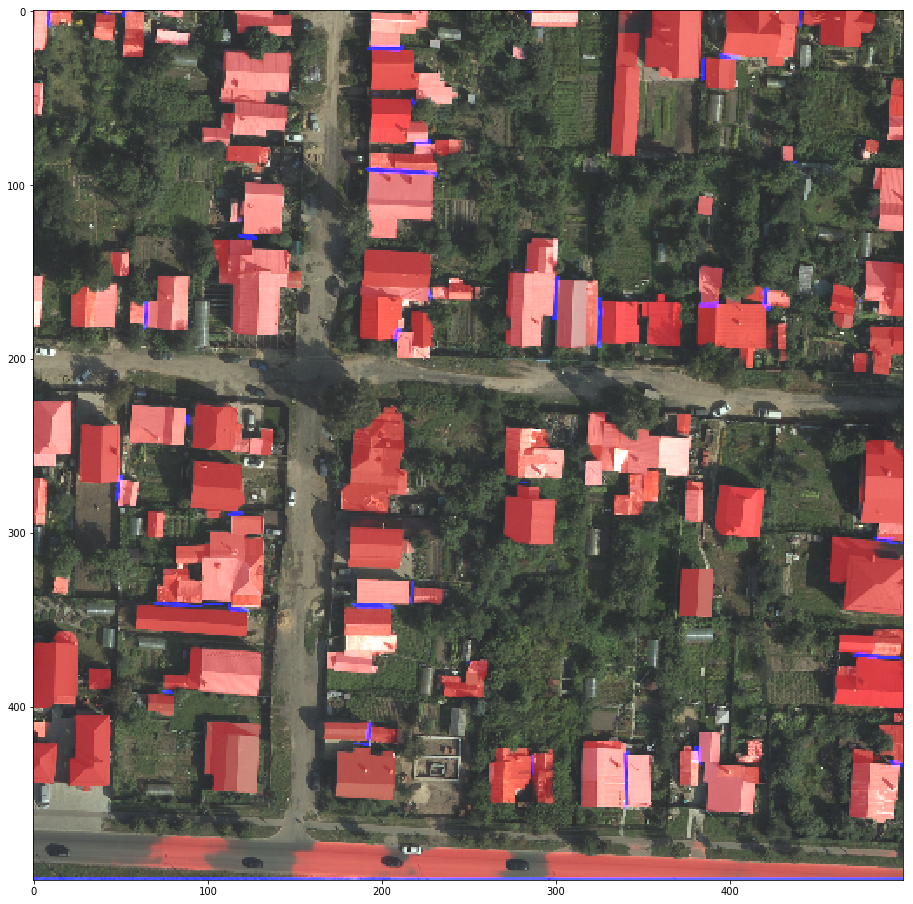

In [33]:
plt.figure(figsize=(16, 16))
plt.imshow(vis_image[-2000::4, -2000::4])
plt.show()

In [37]:
plt.figure(figsize=(16, 16))
plt.imshow(vis_result[-2000::4, -2000::4])
plt.show()